<a href="https://colab.research.google.com/github/venkateshblks/DataScience-practice/blob/main/decision%20tree/Ridge_Lasso_ElasticNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
# # Loading pre-defined Boston Dataset
# boston_dataset = datasets.load_boston()
# #print(boston_dataset.DESCR)
url='http://lib.stat.cmu.edu/datasets/boston'
df=pd.read_csv(url,sep='\s+',skiprows=22,header=None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [22]:
data=np.hstack([df.values[::2,:],df.values[1::2,:3]])
target=df.values[1::2,2]
boston_pd=pd.DataFrame(data)
# df.values[::2,:]
boston_pd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [28]:
boston_pd.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','HOUSE_PRICE']


In [27]:
#Load the data and divide into X and Y varaiable
# boston_pd = pd.DataFrame(boston_dataset.data)

# boston_pd.columns = boston_dataset.feature_names
# boston_pd_target = np.asarray(boston_dataset.target)
# boston_pd['House Price'] = pd.Series(boston_pd_target)

# input
X = boston_pd.iloc[:, :-1]

#output
Y = boston_pd.iloc[:, -1]

boston_pd.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HOUSE_PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [29]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [30]:
x_train, x_test, y_train, y_test = train_test_split(boston_pd.iloc[:, :-1],
                                                    boston_pd.iloc[:, -1],
                                                    test_size=0.25)

(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((379, 13), (379,), (127, 13), (127,))

In [31]:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)
lreg_y_predtrain = lreg.predict(x_train)

# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
mean_squared_errortrain = np.mean((lreg_y_predtrain - y_train)**2)
print("Mean squared Error on test set : ", mean_squared_error)
print("Mean squared Error on train set : ", mean_squared_errortrain)

# Putting together the coefficient and their corrsponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)


Mean squared Error on test set :  32.21974170938044
Mean squared Error on train set :  18.892845925579962
    Columns  Coefficient Estimate
0      CRIM             -0.097668
1        ZN              0.036943
2     INDUS              0.026240
3      CHAS              3.416298
4       NOX            -14.756896
5        RM              4.694859
6       AGE             -0.006951
7       DIS             -1.348974
8       RAD              0.299633
9       TAX             -0.014567
10  PTRATIO             -0.825824
11        B              0.010093
12    LSTAT             -0.479633


<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

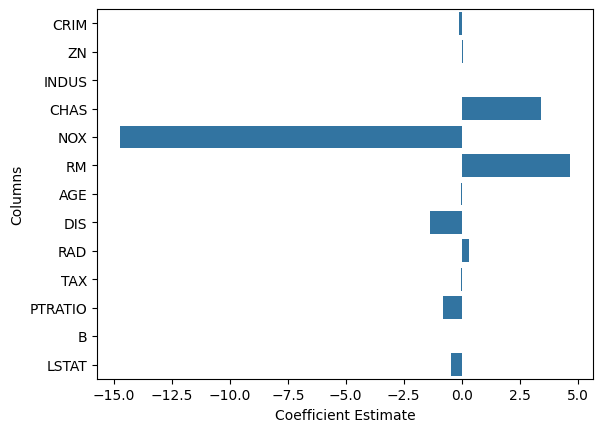

In [32]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=lreg_coefficient)

In [33]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)


32.77221512055901
    Columns  Coefficient Estimate
0      CRIM             -0.094983
1        ZN              0.037980
2     INDUS             -0.000667
3      CHAS              3.195313
4       NOX             -7.851424
5        RM              4.739514
6       AGE             -0.013589
7       DIS             -1.249133
8       RAD              0.286010
9       TAX             -0.015234
10  PTRATIO             -0.756283
11        B              0.010566
12    LSTAT             -0.487159


#### # import Lasso regression from sklearn library



In [34]:
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set 33.414117520766226
    Columns  Coefficient Estimate
0      CRIM             -0.065047
1        ZN              0.039864
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              1.425778
6       AGE              0.022379
7       DIS             -0.549096
8       RAD              0.284455
9       TAX             -0.016654
10  PTRATIO             -0.648798
11        B              0.010280
12    LSTAT             -0.748650


In [42]:
# import model
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = .4,l1_ratio=.5)
e_net.fit(x_train, y_train)

# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
y_pred_elastictrain = e_net.predict(x_train)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
mean_squared_error_train = np.mean((y_pred_elastictrain - y_train)**2)
print("Mean Squared Error on test set", mean_squared_error)
print("Mean Squared Error on train set", mean_squared_error_train)

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff


Mean Squared Error on test set 31.730020216816104
Mean Squared Error on train set 21.851754917411164


,Columns,Coefficient Estimate
0,CRIM,-0.090951
1,ZN,0.046835
2,INDUS,-0.009748
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,2.334256
6,AGE,0.006362
7,DIS,-0.940375
8,RAD,0.343637
9,TAX,-0.019043
